Title: "Electrification Dynamics: Assessing Growth Patterns and Economic Impacts in Low-Income Countries, Benchmarking against Developed Nations"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM


In [2]:
pip install pandas numpy matplotlib statsmodels

Note: you may need to restart the kernel to use updated packages.


# To Load and Prepare Data

In [3]:
import pandas as pd

In [5]:
import pandas as pd

# Provide the correct path and make sure it's enclosed in quotes
file_path = "D:/DATA SCIENCE/DS INTERNSHIP/HAMOYE INTERNSHIP/Hamoye Fall'23 Cohort/CAPSTONE PROJECT FALL'23/Capstone Dataset/Cleaned Dataset/cleaned_dataset_with_incomegroup.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

          countryname countrycode  year  elecrate_total     gdp_value  \
0              Belize         BLZ  1960            29.3  2.807189e+07   
1         Philippines         PHL  1960            16.5  6.684569e+09   
2  Dominican Republic         DOM  1960            20.0  6.723997e+08   
3               Chile         CHL  1960            70.6  4.110000e+09   
4       Venezuela, RB         VEN  1961            58.0  9.058121e+09   

   economicgap (GDP difference)                     Region  \
0                  7.572526e+12  Latin America & Caribbean   
1                  7.565869e+12        East Asia & Pacific   
2                  7.571881e+12  Latin America & Caribbean   
3                  7.568444e+12  Latin America & Caribbean   
4                  7.563496e+12  Latin America & Caribbean   

           IncomeGroup  
0  Upper middle income  
1  Lower middle income  
2  Upper middle income  
3          High income  
4                  NaN  


In [7]:
# To ensure Year is in Data, Time Format.

df['year'] = pd.to_datetime(df['year'], format='%Y')

In [8]:
# Set 'year' as the index
df.set_index('year', inplace=True)

In [9]:
# Display the first few rows of the dataset

print(df.head())

                   countryname countrycode  elecrate_total     gdp_value  \
year                                                                       
1960-01-01              Belize         BLZ            29.3  2.807189e+07   
1960-01-01         Philippines         PHL            16.5  6.684569e+09   
1960-01-01  Dominican Republic         DOM            20.0  6.723997e+08   
1960-01-01               Chile         CHL            70.6  4.110000e+09   
1961-01-01       Venezuela, RB         VEN            58.0  9.058121e+09   

            economicgap (GDP difference)                     Region  \
year                                                                  
1960-01-01                  7.572526e+12  Latin America & Caribbean   
1960-01-01                  7.565869e+12        East Asia & Pacific   
1960-01-01                  7.571881e+12  Latin America & Caribbean   
1960-01-01                  7.568444e+12  Latin America & Caribbean   
1961-01-01                  7.563496e+12 

In [10]:
print(df.head())

                   countryname countrycode  elecrate_total     gdp_value  \
year                                                                       
1960-01-01              Belize         BLZ            29.3  2.807189e+07   
1960-01-01         Philippines         PHL            16.5  6.684569e+09   
1960-01-01  Dominican Republic         DOM            20.0  6.723997e+08   
1960-01-01               Chile         CHL            70.6  4.110000e+09   
1961-01-01       Venezuela, RB         VEN            58.0  9.058121e+09   

            economicgap (GDP difference)                     Region  \
year                                                                  
1960-01-01                  7.572526e+12  Latin America & Caribbean   
1960-01-01                  7.565869e+12        East Asia & Pacific   
1960-01-01                  7.571881e+12  Latin America & Caribbean   
1960-01-01                  7.568444e+12  Latin America & Caribbean   
1961-01-01                  7.563496e+12 

In [12]:
print(df.info)

<bound method DataFrame.info of                    countryname countrycode  elecrate_total     gdp_value  \
year                                                                       
1960-01-01              Belize         BLZ           29.30  2.807189e+07   
1960-01-01         Philippines         PHL           16.50  6.684569e+09   
1960-01-01  Dominican Republic         DOM           20.00  6.723997e+08   
1960-01-01               Chile         CHL           70.60  4.110000e+09   
1961-01-01       Venezuela, RB         VEN           58.00  9.058121e+09   
...                        ...         ...             ...           ...   
2015-01-01            Paraguay         PRY           99.33  2.728258e+10   
2015-01-01                Togo         TGO           48.30  4.087628e+09   
2015-01-01            Colombia         COL           97.70  2.915196e+11   
2015-01-01              Belize         BLZ           91.80  1.742546e+09   
2015-01-01                Peru         PER           74.

# TIME SERIES ANALYSIS ARIMA MODEL

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [15]:
df = pd.read_csv("D:/DATA SCIENCE/DS INTERNSHIP/HAMOYE INTERNSHIP/Hamoye Fall'23 Cohort/CAPSTONE PROJECT FALL'23/Capstone Dataset/Cleaned Dataset/cleaned_dataset_with_incomegroup.csv")




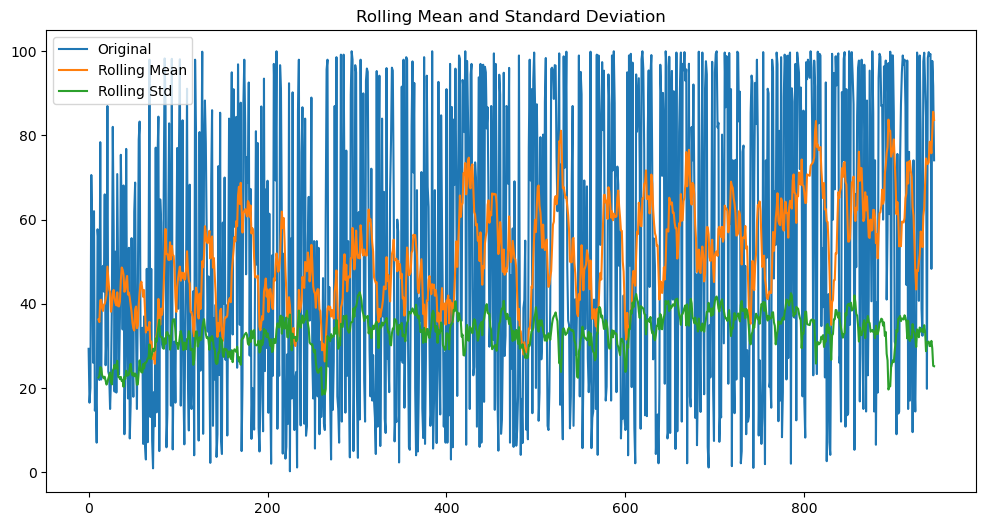

ADF Statistic: -15.643129747038634
p-value: 1.6309042530133131e-28
Critical Values: {'1%': -3.437303541847512, '5%': -2.864609814371715, '10%': -2.5684045480287296}


In [16]:
# Function to perform Dickey-Fuller test for stationarity
def test_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

    # Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Extract the 'elecrate_total' column
timeseries = df['elecrate_total']

# Check for stationarity
test_stationarity(timeseries)


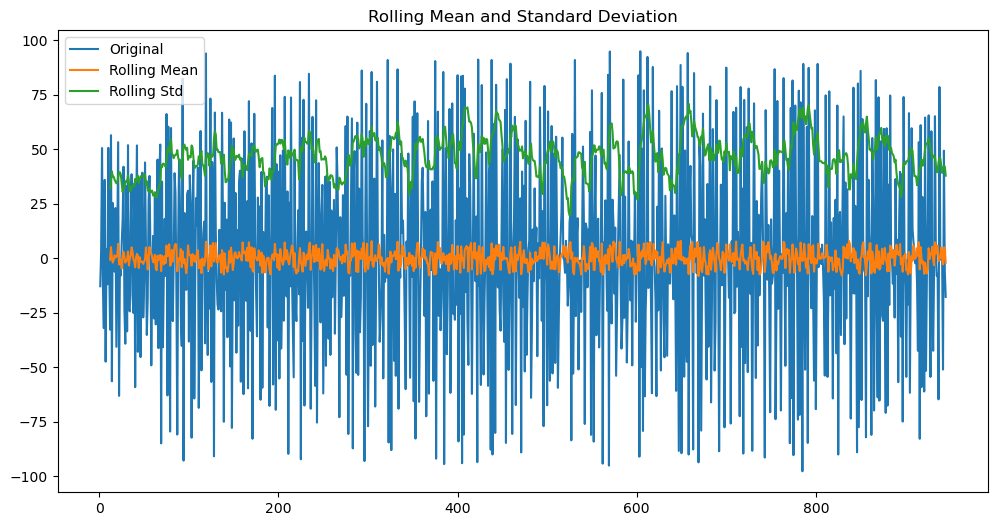

ADF Statistic: -10.84089368643973
p-value: 1.6170342759837142e-19
Critical Values: {'1%': -3.437454636606558, '5%': -2.8646764401027336, '10%': -2.5684400361180333}


In [17]:
# If the series is not stationary, perform differencing
timeseries_diff = timeseries.diff().dropna()

# Check for stationarity after differencing
test_stationarity(timeseries_diff)


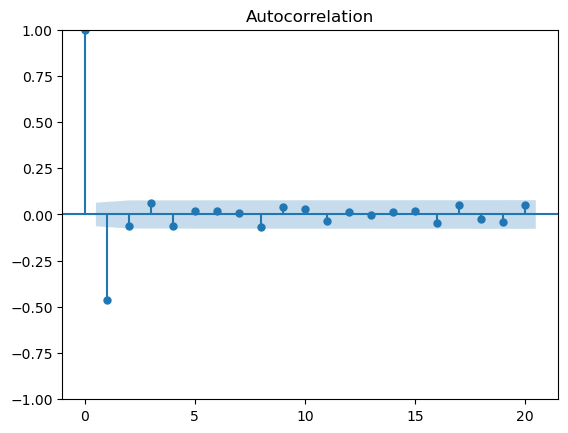

C:\Users\kandh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


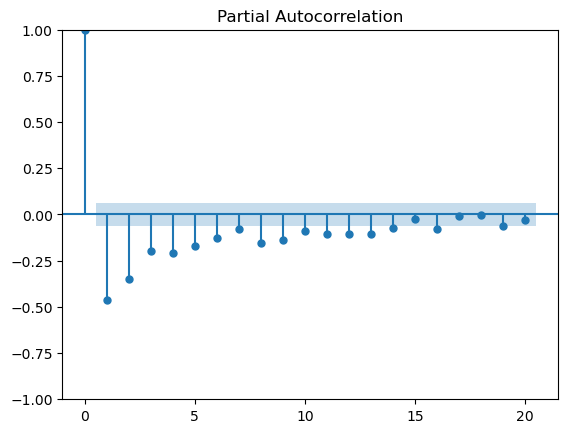

In [18]:
# Plot ACF and PACF to identify parameters
plot_acf(timeseries_diff, lags=20)
plt.show()

plot_pacf(timeseries_diff, lags=20)
plt.show()


In [19]:
# Fit ARIMA model
p, d, q = 1, 1, 1  # Adjust these parameters based on ACF and PACF plots
model = ARIMA(timeseries, order=(p, d, q))
results = model.fit()

# Display model summary
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:         elecrate_total   No. Observations:                  946
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4664.237
Date:                Wed, 13 Dec 2023   AIC                           9334.475
Time:                        22:11:32   BIC                           9349.028
Sample:                             0   HQIC                          9340.021
                                - 946                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0651      0.033      1.963      0.050    9.36e-05       0.130
ma.L1         -0.9887      0.006   -175.602      0.000      -1.000      -0.978
sigma2      1129.1979    100.517     11.234      0.0

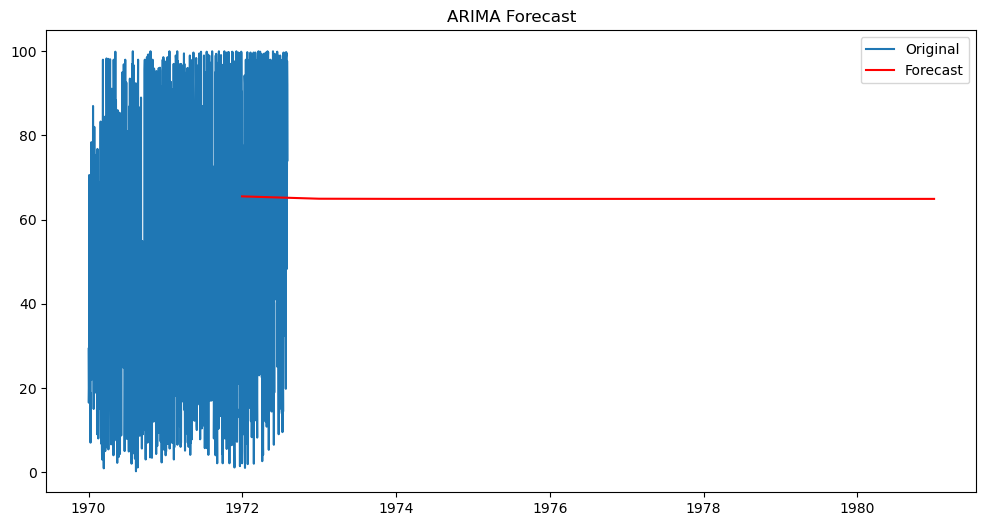

In [20]:
# Forecast future values
forecast_steps = 10  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(timeseries.index[-1], periods=forecast_steps + 1, freq='A')[1:]
forecast_values = forecast.predicted_mean

# Plot the original series and forecast
plt.figure(figsize=(12, 6))
plt.plot(timeseries, label='Original')
plt.plot(forecast_index, forecast_values, color='red', label='Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv("D:/DATA SCIENCE/DS INTERNSHIP/HAMOYE INTERNSHIP/Hamoye Fall'23 Cohort/CAPSTONE PROJECT FALL'23/Capstone Dataset/Cleaned Dataset/cleaned_dataset_with_incomegroup.csv")


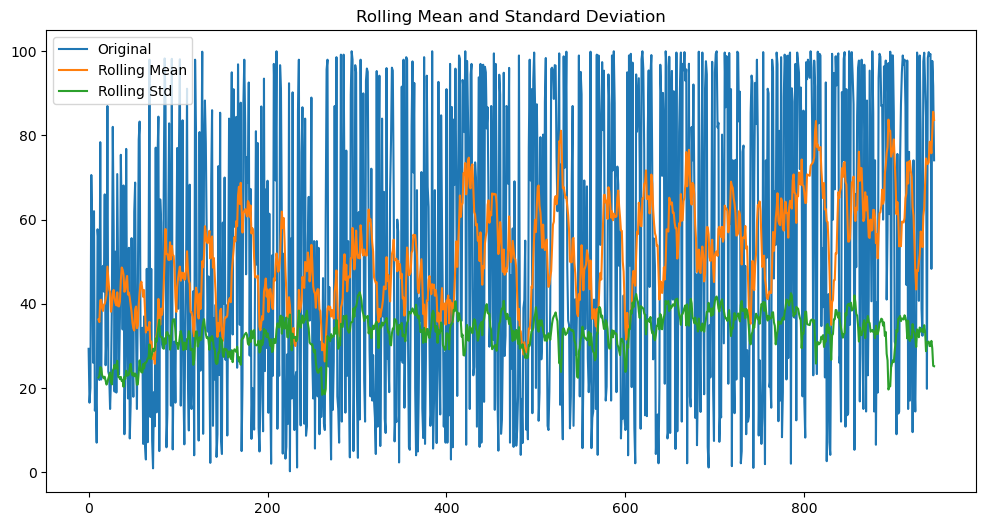

ADF Statistic: -15.643129747038634
p-value: 1.6309042530133131e-28
Critical Values: {'1%': -3.437303541847512, '5%': -2.864609814371715, '10%': -2.5684045480287296}


In [4]:
# Function to perform Dickey-Fuller test for stationarity
def test_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

    # Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Extract the 'elecrate_total' column
timeseries = df['elecrate_total']

# Check for stationarity
test_stationarity(timeseries)


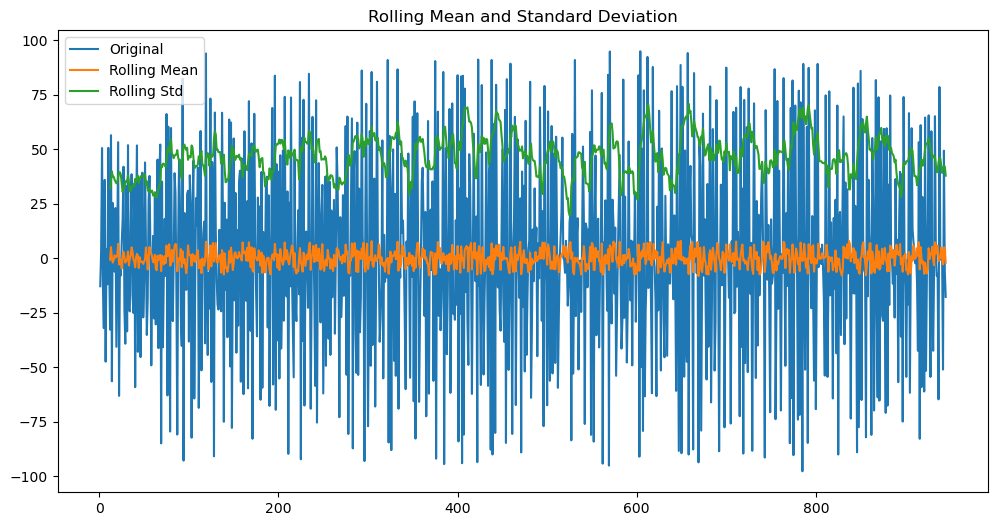

ADF Statistic: -10.84089368643973
p-value: 1.6170342759837142e-19
Critical Values: {'1%': -3.437454636606558, '5%': -2.8646764401027336, '10%': -2.5684400361180333}


In [5]:
# If the series is not stationary, perform differencing
timeseries_diff = timeseries.diff().dropna()

# Check for stationarity after differencing
test_stationarity(timeseries_diff)


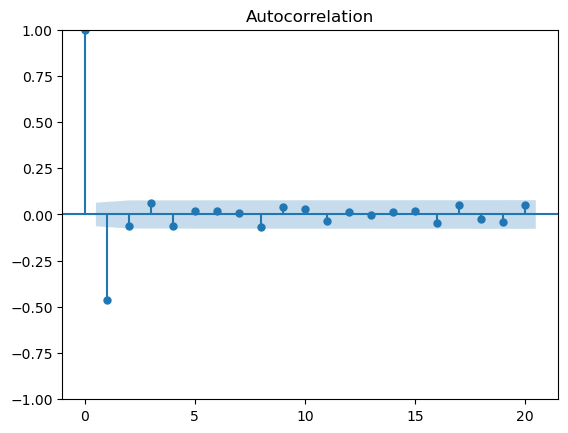

C:\Users\kandh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


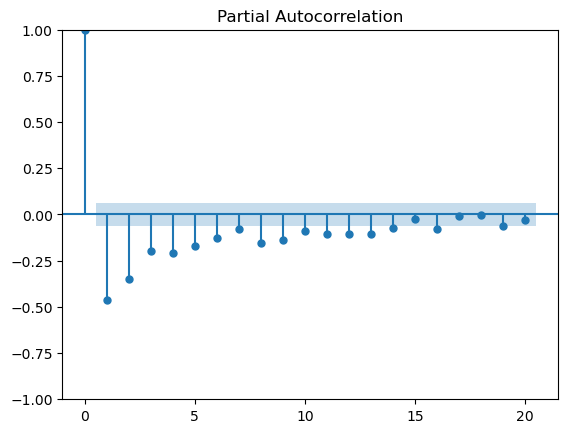

In [6]:
# Plot ACF and PACF to identify parameters
plot_acf(timeseries_diff, lags=20)
plt.show()

plot_pacf(timeseries_diff, lags=20)
plt.show()


In [7]:
# Fit ARIMA model
p, d, q = 1, 1, 1  # Adjust these parameters based on ACF and PACF plots
model = ARIMA(timeseries, order=(p, d, q))
results = model.fit()

# Display model summary
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:         elecrate_total   No. Observations:                  946
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4664.237
Date:                Wed, 13 Dec 2023   AIC                           9334.475
Time:                        22:47:26   BIC                           9349.028
Sample:                             0   HQIC                          9340.021
                                - 946                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0651      0.033      1.963      0.050    9.36e-05       0.130
ma.L1         -0.9887      0.006   -175.602      0.000      -1.000      -0.978
sigma2      1129.1979    100.517     11.234      0.0

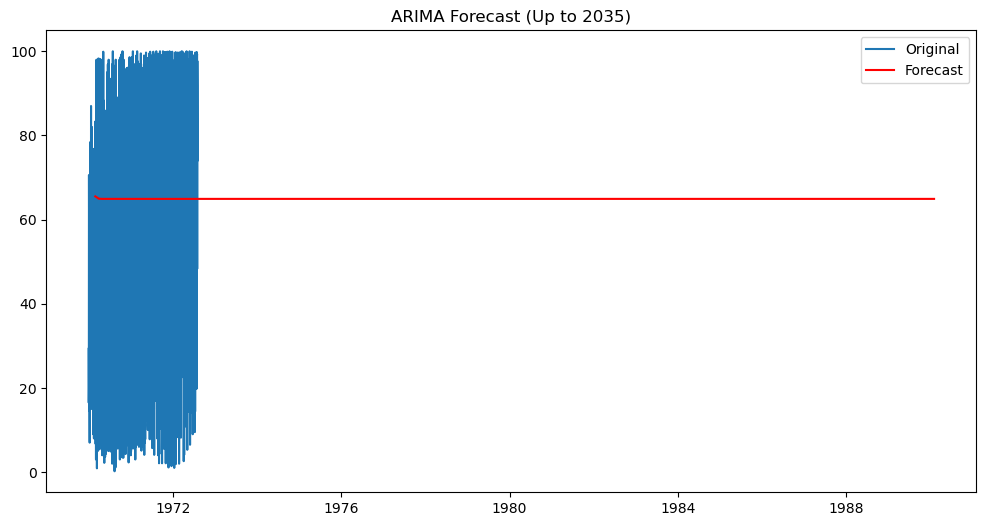

In [8]:
# Forecast future values
forecast_years = 20  # Adjust as needed
forecast_steps = forecast_years * 12  # Monthly data, adjust if your data is not monthly
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(timeseries.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_values = forecast.predicted_mean

# Plot the original series and forecast
plt.figure(figsize=(12, 6))
plt.plot(timeseries, label='Original')
plt.plot(forecast_index, forecast_values, color='red', label='Forecast')
plt.legend()
plt.title('ARIMA Forecast (Up to 2035)')
plt.show()
